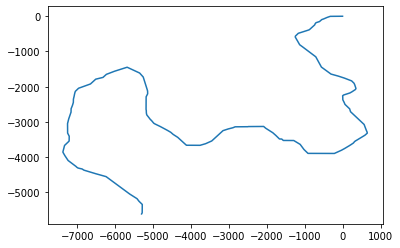

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import copy
%matplotlib inline

# 2pi radians divided by sixteen sectors = the size of a sector in radians
angle = 2*np.pi / 16

def scoord(x,y):
    return ("(" + str(x) + "," + str(y) + ")")

# either returns 1 or -1 with equal probability
def sign():
    return (1 if np.random.randint(0,2) else -1)

# course iteration function for random walk
def next_course(current_course):
    if not (0 <= current_course <= 15): return np.random.randint(16)
    return (current_course + sign() * np.random.binomial(10,.002)) % 16

# speed iteration function for random walk
def next_speed(current_speed):
    if not (3 <= current_speed <= 7): return np.random.randint(3,8)
    return max(min( (current_speed + (sign() * np.random.binomial(3,.01)) ),7),3)

# position interation function for random walk
def next_position(current_position, crs, spd, ang = angle):
    next = [int(current_position[0] + spd*np.sin(crs*ang))]
    next.append(int(current_position[1] + spd*np.cos(crs*ang)))
    return next

x, y, courses, speeds, t = [],[],[],[],[]

#courses = [22.5*i for i in range(16)]

crs = 12
spd = 5
pos = [0,0]
for i in range(5000):
    crs = next_course(crs)
    spd = next_speed(spd)
    pos = next_position(pos, crs, spd)
    #print(pos)
    x.append(pos[0])
    y.append(pos[1])
    courses.append(crs)
    speeds.append(spd)
    t.append(i)



fig = plt.figure()
# create a plot into the figure
ax = fig.add_subplot(111)
# plot the data
ax.plot(x, y)
plt.show()


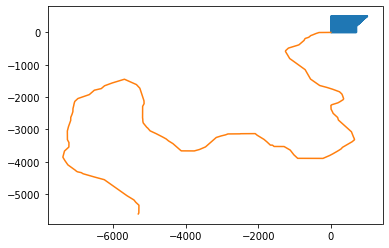

In [14]:
# run in sequence after previous block OR ELSE

old_x, old_y = copy.copy(x), copy.copy(y)

#tests to see if an (x,y) pair is in an [arbitrary] polygon
def testpoly(x,y):
    conds = (y >= 0) * (y <= 500) * (x >= 0) * (x <= 700 if y <= 200 else 1) * \
    ((y >= (x - 500)) if (y >= 200) else 1)
    return conds
sector = []
for x in range(1000):
    for y in range(1000):
        if testpoly(x,y):
            sector.append([x,y])

# sort of arbitrary sector            
sector = np.array(sector)
xval = sector[:,0]
yval = sector[:,1]
fig = plt.figure()

# create a plot into the figure
ax = fig.add_subplot(111)
# plot the data
ax.plot(xval, yval)
ax.plot(old_x, old_y)
plt.show()

In [4]:
# itemizes sectors with a hash table for speed
sector_hash = {}
for i, val in enumerate(sector):
    temp = scoord(val[0],val[1])
    sector_hash[temp] = i
    

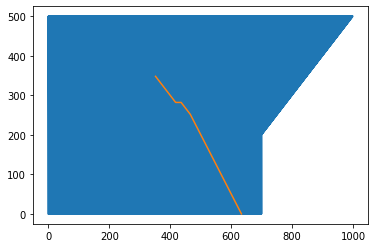

In [16]:
#better superposition of walker on defined sector

x, y, courses, speeds, t = [],[],[],[],[]
crs = 5
spd = 3
pos = [350,350]
for i in range(5000):
    crs = next_course(crs)
    spd = next_speed(spd)
    pos = next_position(pos, crs, spd)
    #print(pos)
    if scoord(pos[0],pos[1]) in sector_hash:
        x.append(pos[0])
        y.append(pos[1])
        courses.append(crs)
        speeds.append(spd)
        t.append(i)
fig = plt.figure()
# create a plot into the figure
ax = fig.add_subplot(111)
# plot the data

ax.plot(xval, yval)
ax.plot(x, y)

plt.show()